# Sisè de primaria

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [204]:
import pandas as pd
from sodapy import Socrata

# Replace None with your app token "AVDM_Competencies" for authenticated access
client = Socrata("analisi.transparenciacatalunya.cat", "m9Y54hwBbAj3B7xBgcCqQEXBa")

# Fetch the first 2000 results as JSON and convert them to a Python list of dictionaries
results = client.get("rk5x-gny6",limit=1000000)

# Convert to pandas DataFrame
sise = pd.DataFrame.from_records(results)

# Display the DataFrame
print(sise)

         any codi_alumne   pcat pcat_cl pcat_ee  pcast pcast_cl pcast_ee  \
0       2023  3293538667   82.7   88.64   66.67     92      100    88.89   
1       2023  3293527446   73.7   81.82   55.56     81    86.36    72.22   
2       2023  3293515234     82   79.55   77.78   88.7    90.91    83.33   
3       2023  3293504013   53.5   68.18   22.22   71.8       75    66.67   
4       2023  3293493679   37.9   31.82   38.89    NaN      NaN      NaN   
...      ...         ...    ...     ...     ...    ...      ...      ...   
963028  2009         NaN  45.78   56.82   33.33  51.22    74.42    25.64   
963029  2009         NaN   74.7   81.82   66.67  95.12      100    89.74   
963030  2009         NaN  84.34     100   66.67  95.12     90.7      100   
963031  2009         NaN  61.45   84.09    35.9  69.51    93.02    43.59   
963032  2009         NaN  39.76   59.09   17.95  30.49    46.51    12.82   

         pmat pmat_nc  ... genere mes_naixement any_naixement  \
0        67.4   85.71 

In [205]:
# Select specific columns
sise = sise[['any','codi_alumne','pcat', 'pcast', 'pang', 'pmat', 'pmed']]

print(sise)

         any codi_alumne   pcat  pcast   pang   pmat   pmed
0       2023  3293538667   82.7     92    100   67.4  61.39
1       2023  3293527446   73.7     81  95.17   89.4  88.33
2       2023  3293515234     82   88.7   93.5    100  96.67
3       2023  3293504013   53.5   71.8  86.83   87.2  70.28
4       2023  3293493679   37.9    NaN    NaN    NaN  27.78
...      ...         ...    ...    ...    ...    ...    ...
963028  2009         NaN  45.78  51.22    NaN  57.83    NaN
963029  2009         NaN   74.7  95.12    NaN  84.34    NaN
963030  2009         NaN  84.34  95.12    NaN  89.16    NaN
963031  2009         NaN  61.45  69.51    NaN  79.52    NaN
963032  2009         NaN  39.76  30.49    NaN  77.11    NaN

[963033 rows x 7 columns]


In [206]:
# Count how many times each object appears in the column
value_counts = sise['any'].value_counts()

# To count the number of occurrences of a specific object (e.g., 'apple')
count23 = value_counts.get('2023', 0)  # Defaults to 0 if 'apple' isn't in the column
count22 = value_counts.get('2022', 0)  # Defaults to 0 if 'apple' isn't in the column
count21 = value_counts.get('2021', 0)  # Defaults to 0 if 'apple' isn't in the column
count20 = value_counts.get('2020', 0)  # Defaults to 0 if 'apple' isn't in the column
count19 = value_counts.get('2019', 0)  # Defaults to 0 if 'apple' isn't in the column
count18 = value_counts.get('2018', 0)  # Defaults to 0 if 'apple' isn't in the column
count17 = value_counts.get('2017', 0)  # Defaults to 0 if 'apple' isn't in the column
count16 = value_counts.get('2016', 0)  # Defaults to 0 if 'apple' isn't in the column
count15 = value_counts.get('2015', 0)  # Defaults to 0 if 'apple' isn't in the column
count14 = value_counts.get('2014', 0)  # Defaults to 0 if 'apple' isn't in the column
count13 = value_counts.get('2013', 0)  # Defaults to 0 if 'apple' isn't in the column

count6=np.array([count19,count18,count17,count16,count15,count14,count13])

print(count6)

[74792 74207 72036 71244 69526 66908 65598]


In [240]:
aa=sise.loc[sise['any'] == str(2020)]
print(aa)

Empty DataFrame
Columns: [any, codi_alumne, pcat, pcast, pang, pmat, pmed]
Index: []


In [220]:
# mitjanes de les assignatures seleccionades per cada any començant pel 2009
msise=np.zeros([14,4])

for i in range(2010,2024):
    #selecciono l'any d'estudi
    an = sise[sise['any'] == str(i)]
    
    #elimina els NaN
    an = an.dropna(how='all')
    
    #per les diferents proves cal passar els valors que es troben en string a numeric
    pcat=pd.to_numeric(an['pcat'], errors='coerce')
    pcast=pd.to_numeric(an['pcast'], errors='coerce')
    pang=pd.to_numeric(an['pang'], errors='coerce')
    pmat=pd.to_numeric(an['pmat'], errors='coerce')
    #pmed=pd.to_numeric(an['pmed'], errors='coerce')

    
    #mitjana de cada assigantura
    mcat=pcat.mean()
    mcast=pcast.mean()
    mang=pang.mean()
    mmat=pmat.mean()
    #mmed=pmed.mean()

    #array de mitjanes
    mi=np.array([mcat,mcast,mang,mmat])
    n=int(i-2010)
    msise[n]=mi

#print(any19.iloc[:,3])


print(msise[2])


[79.66834068 76.62047947 74.30327956 80.27099827]


In [225]:
print(msise[10])

[nan nan nan nan]


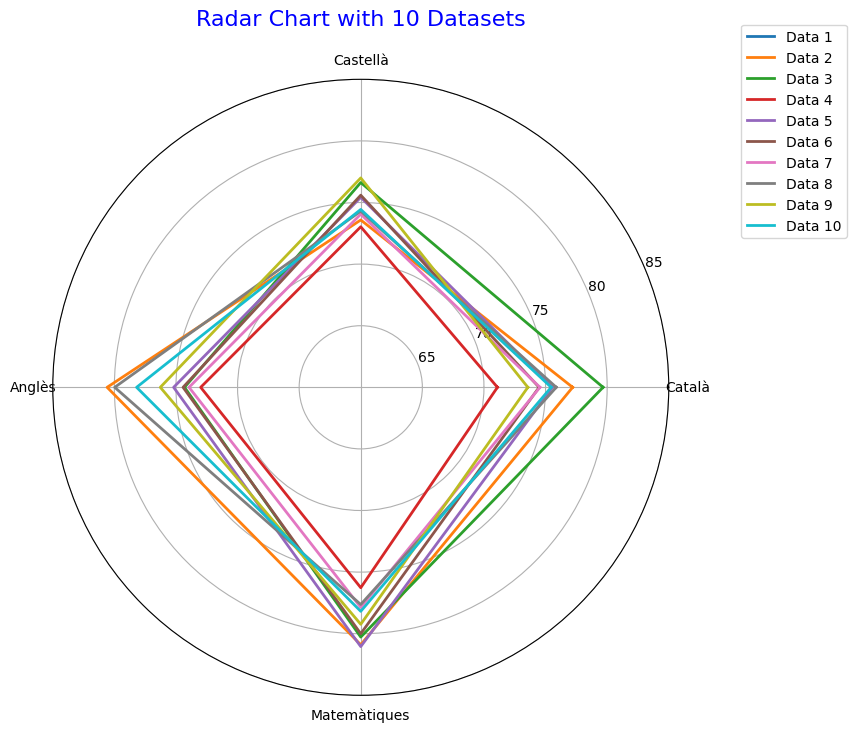

In [196]:
#els 10 anys que em permeten comparar amb les de quart
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 sets
msise1 = [
    list(msise[0]),  # Data 0
    list(msise[1]),  # Data 1
    list(msise[2]),  # Data 2
    list(msise[3]),  # Data 3
    list(msise[4]),  # Data 4
    list(msise[5]),  # Data 5
    list(msise[6]),  # Data 6
    list(msise[7]),  # Data 7
    list(msise[8]),  # Data 8
    list(msise[9])  # Data 9
]

# Categories
categories = ['Català', 'Castellà', 'Anglès', 'Matemàtiques']

# Calculate angles
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot each dataset
colors = plt.cm.tab10(np.linspace(0, 1, len(msise1)))  # Generate 10 distinct colors
for idx, values in enumerate(msise1):
    values += values[:1]  # Close the data loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Data {idx + 1}', color=colors[idx])
    #ax.fill(angles, values, alpha=0.25, color=colors[idx])  # Optional fill

# Configure labels and title
ax.set_xticks(angles[:-1])  # Set category labels
ax.set_xticklabels(categories)
plt.ylim([60,85])
plt.title('Radar Chart with 10 Datasets', size=16, color='blue', pad=20)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()

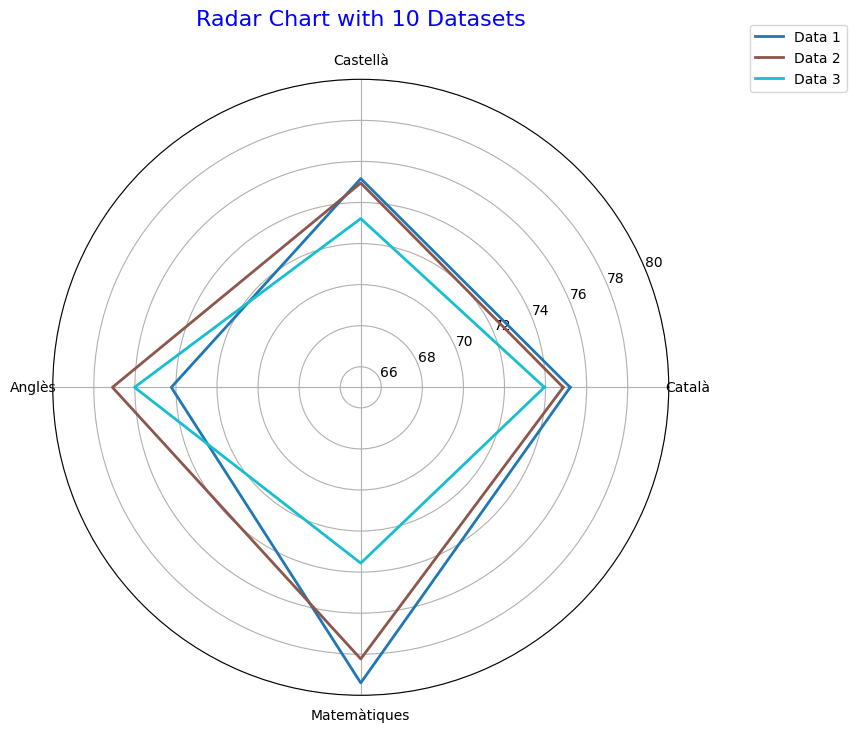

In [234]:
#12 anys en blocs de 4 per veure la progressió general
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 sets
msise1 = [
    list((msise[2]+msise[3]+msise[4]+msise[5])/4),  # Data 0
    list((msise[6]+msise[7]+msise[8]+msise[9])/4),  # Data 1
    list((msise[11]+msise[12]+msise[13])/3)  # Data 2
]

# Categories
categories = ['Català', 'Castellà', 'Anglès', 'Matemàtiques']

# Calculate angles
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot each dataset
colors = plt.cm.tab10(np.linspace(0, 1, len(msise1)))  # Generate 10 distinct colors
for idx, values in enumerate(msise1):
    values += values[:1]  # Close the data loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Data {idx + 1}', color=colors[idx])
    #ax.fill(angles, values, alpha=0.25, color=colors[idx])  # Optional fill

# Configure labels and title
ax.set_xticks(angles[:-1])  # Set category labels
ax.set_xticklabels(categories)
plt.ylim([65,80])
plt.title('Radar Chart with 10 Datasets', size=16, color='blue', pad=20)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()

# Quart de la ESO

In [83]:
import pandas as pd
from sodapy import Socrata

# Replace None with your app token "AVDM_Competencies" for authenticated access
client = Socrata("analisi.transparenciacatalunya.cat", "m9Y54hwBbAj3B7xBgcCqQEXBa")

# Fetch the first 2000 results as JSON and convert them to a Python list of dictionaries
results = client.get("59vm-wwq7",limit=1000000)

# Convert to pandas DataFrame
quart = pd.DataFrame.from_records(results)

# Display the DataFrame
print(quart)

         any codi_alumne   pcat pcat_cl pcat_ee  pcast pcast_cl pcast_ee  \
0       2023  3901524245  75.23   73.75   78.13   79.4       74     87.5   
1       2023  3903493698  65.61   70.11   59.38  74.55       68    84.38   
2       2023  4328915551  38.11   53.71   15.63   50.7       72    18.75   
3       2023  3901434261  89.37   90.15    87.5  86.45       92    78.13   
4       2023  3900118187  65.56   71.93   56.25  63.35       66    59.38   
...      ...         ...    ...     ...     ...    ...      ...      ...   
778548  2012         NaN   58.2      68    48.4  63.21    57.67    68.75   
778549  2012         NaN   76.3      80    72.6  60.65    80.67    40.63   
778550  2012         NaN  74.74      92   57.48  69.04    69.33    68.75   
778551  2012         NaN  69.23      84   54.45  77.83    80.67       75   
778552  2012         NaN  63.76      64   63.53  74.08    73.17       75   

         pang pang_co  ...            h_bitat pfran pfran_co pfran_cl  \
0        78.4 

In [84]:
# Select specific columns
quart = quart[['any','codi_alumne','pcat', 'pcast', 'pang', 'pmat', 'pcien']]

print(quart)

         any codi_alumne   pcat  pcast   pang   pmat  pcien
0       2023  3901524245  75.23   79.4   78.4  80.81   82.7
1       2023  3903493698  65.61  74.55     74  66.06  77.27
2       2023  4328915551  38.11   50.7     56  31.69  50.51
3       2023  3901434261  89.37  86.45   88.8  90.56  84.34
4       2023  3900118187  65.56  63.35   66.6  42.36  62.75
...      ...         ...    ...    ...    ...    ...    ...
778548  2012         NaN   58.2  63.21  50.78   74.8    NaN
778549  2012         NaN   76.3  60.65     44   83.8    NaN
778550  2012         NaN  74.74  69.04  61.33   64.9    NaN
778551  2012         NaN  69.23  77.83  85.11   89.5    NaN
778552  2012         NaN  63.76  74.08  49.89   75.6    NaN

[778553 rows x 7 columns]


In [249]:
aa=quart.loc[quart['any'] == str(2020)]
print(aa)

         any codi_alumne   pcat  pcast  pang   pmat pcien
212680  2020  7965315855   81.6  92.78  89.2  93.65    84
212681  2020  8048375514   86.6  84.31  70.6  87.22  83.8
212682  2020  7901097662   90.1   97.5  77.4    100  97.6
212683  2020  7901119215  86.45  88.06  82.4  94.72  91.9
212684  2020  8048926684     84  78.06  62.2   80.6  69.2
...      ...         ...    ...    ...   ...    ...   ...
282803  2020  3258431796    NaN  65.42   NaN    NaN  64.1
282804  2020  3257868411  79.15  78.19  81.2  55.36  61.7
282805  2020  3258228375  74.15  89.44  73.2  83.37  69.7
282806  2020  3258487126   85.2  86.94  85.8  91.67  82.6
282807  2020  3258127160  91.25  85.83  95.4    100  89.6

[70128 rows x 7 columns]


In [265]:
# mitjanes de les assignatures seleccionades per cada any començant pel 2009
mquart=np.zeros([12,4])

for i in range(2012,2024):
    #selecciono l'any d'estudi
    an = quart[quart['any'] == str(i)]
    
    #elimina els NaN
    an = an.dropna(how='all')
    
    #per les diferents proves cal passar els valors que es troben en string a numeric
    pcat=pd.to_numeric(an['pcat'], errors='coerce')
    pcast=pd.to_numeric(an['pcast'], errors='coerce')
    pang=pd.to_numeric(an['pang'], errors='coerce')
    pmat=pd.to_numeric(an['pmat'], errors='coerce')
    #pmed=pd.to_numeric(an['pmed'], errors='coerce')

    
    #mitjana de cada assigantura
    mcat=pcat.mean()
    mcast=pcast.mean()
    mang=pang.mean()
    mmat=pmat.mean()
    #mmed=pmed.mean()

    #array de mitjanes
    mi=np.array([mcat,mcast,mang,mmat])
    n=int(i-2012)
    mquart[n]=mi

#print(any19.iloc[:,3])


print(mquart[2])


[77.13919146 76.39128032 66.85929037 69.10077   ]


In [270]:
print(mquart[3])

[71.78126747 75.14630959 69.28335208 68.66400243]


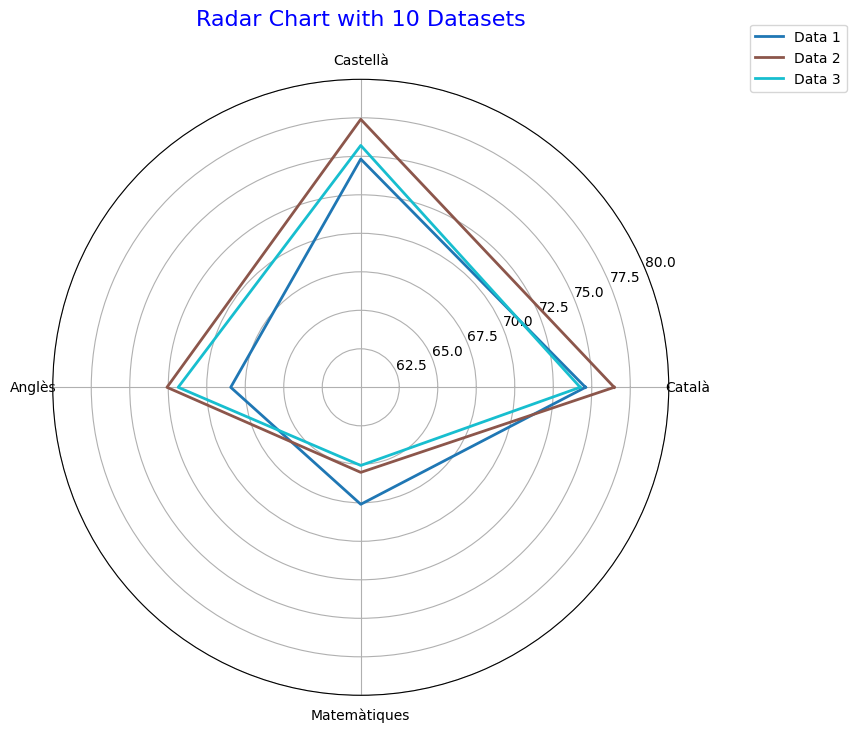

In [271]:
#12 anys en blocs de 4 per veure la progressió general
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 sets
mquart1 = [ 
    list((mquart[0]+mquart[1]+mquart[2]+mquart[3])/4),  # Data 0
    list((mquart[4]+mquart[5]+mquart[6]+mquart[7])/4),  # Data 1
    list((mquart[8]+mquart[9]+mquart[10]+mquart[11])/4)  # Data 2
]

# Categories
categories = ['Català', 'Castellà', 'Anglès', 'Matemàtiques']

# Calculate angles
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot each dataset
colors = plt.cm.tab10(np.linspace(0, 1, len(mquart1)))  # Generate 10 distinct colors
for idx, values in enumerate(mquart1):
    values += values[:1]  # Close the data loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Data {idx + 1}', color=colors[idx])
    #ax.fill(angles, values, alpha=0.25, color=colors[idx])  # Optional fill

# Configure labels and title
ax.set_xticks(angles[:-1])  # Set category labels
ax.set_xticklabels(categories)
plt.ylim([60,80])
plt.title('Radar Chart with 10 Datasets', size=16, color='blue', pad=20)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()

# Diferència 

In [169]:
mdif=np.array(mquart1)-np.array(msise1)
mdif=np.abs(mdif)
print(msise1)

[[73.6512792337323, 71.18704021512006, 71.37677346562623, 78.2302728158493, 71.37677346562623, 73.6512792337323], [77.19818012452811, 73.58237366003064, 80.58709799550915, 80.89832118679752, 80.58709799550915, 77.19818012452811], [79.66834067936517, 76.62047947007568, 74.30327956320195, 80.27099826657587, 74.30327956320195, 79.66834067936517], [71.09451102975397, 73.02916718237516, 72.99230960290603, 76.26586190946097, 72.99230960290603, 71.09451102975397], [75.55872020914396, 75.41799630655588, 75.18870688737897, 81.04462962122929, 75.18870688737897, 75.55872020914396], [74.47592462598166, 75.59433310498622, 74.42300664305989, 80.00011335195856, 74.42300664305989, 74.47592462598166], [74.54511527254029, 74.05539365201419, 73.93830320783026, 77.8705713798881, 73.93830320783026, 74.54511527254029], [75.86877701656225, 74.29946717157497, 79.97269521018279, 77.62723249486368, 79.97269521018279, 75.86877701656225], [73.5613757175977, 76.99460304841273, 76.27108356745441, 79.23408807359574,

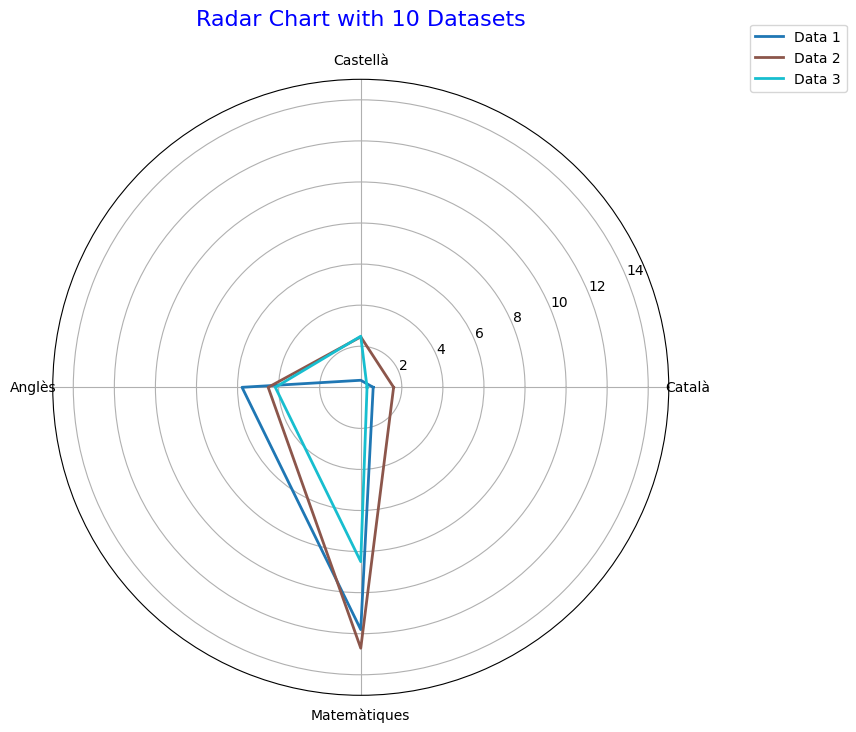

In [280]:
#12 anys en blocs de 4 per veure la progressió general
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 sets
mquart1 = [ 
    list(np.abs((mquart[0]+mquart[1]+mquart[2]+mquart[3])/4-(msise[2]+msise[3]+msise[4]+msise[5])/4)),  # Data 0
    list(np.abs((mquart[4]+mquart[5]+mquart[6]+mquart[7])/4-(msise[6]+msise[7]+msise[8]+msise[9])/4)),  # Data 1
    list(np.abs((mquart[8]+mquart[9]+mquart[10]+mquart[11])/4-(msise[11]+msise[12]+msise[13])/3))  # Data 2
]


# Categories
categories = ['Català', 'Castellà', 'Anglès', 'Matemàtiques']

# Calculate angles
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot each dataset
colors = plt.cm.tab10(np.linspace(0, 1, len(mquart1)))  # Generate 10 distinct colors
for idx, values in enumerate(mquart1):
    values += values[:1]  # Close the data loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Data {idx + 1}', color=colors[idx])
    #ax.fill(angles, values, alpha=0.25, color=colors[idx])  # Optional fill

# Configure labels and title
ax.set_xticks(angles[:-1])  # Set category labels
ax.set_xticklabels(categories)
plt.ylim([0,15])
plt.title('Radar Chart with 10 Datasets', size=16, color='blue', pad=20)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()

In [162]:
a=np.array([1,2,3,4])
print(a[0:3])

[1 2 3]


# Matemàtiques

# Plot final